In the attached spreadsheet you have the data for a specific day of clickTime splitted by agencyID, campName, cK count and time:
- The agencyID is the ID of each agency.
- campName is the value of each campaign.
- ck Count is the amount of clicks
- time is the the time to click for each specific campName

1. Please find the average distribution of ckCount by time across all the agencies.

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("ClickTimeYesterday_campname.csv", sep=";")

In [13]:
df.head(15)

,date,agencyId,campname,ckCount,time,"bar(count(), 0, 50000, 300)"
0,2021-11-18,40,1510_US,6,20,NaN
1,2021-11-18,39,3aa12d1b32,1,90,NaN
2,2021-11-18,39,7264cdc8ba,15,280,NaN
3,2021-11-18,58,27021_US,14,250,NaN
4,2021-11-18,17,f|23848726163170277|{{adset.id_id}},1,55,NaN
5,2021-11-18,40,40792_US,1,450,NaN
6,2021-11-18,40,40976_US,1,15,NaN
7,2021-11-18,39,29c6a24450,3,30,NaN
8,2021-11-18,38,DM:TARW-NO-ALL-ALL-Erp Systems DT 1611__erp sy...,1,120,NaN
9,2021-11-18,39,99ccce4f6a,4,40,NaN


In [14]:
df['time'].max()

3595

In [15]:
len(df['time'].unique())

547

In [16]:
# We can group the feature 'time' in ranges. We will set the number of splits in 20

splits_n = 20
label_range = np.round(np.linspace(0,max(df.time)+1,splits_n),3)
label_range = [round(x) for x in label_range]
df['timeRange'] = pd.cut(df.time,bins=label_range,
                         labels=['[{}-{})'.format(label_range[i],label_range[i+1]) for i in np.arange(0,splits_n-1)],
                         right=False)

In [17]:
# Now, we can group the number of clicks by time range

df_time = df.groupby(['timeRange']).agg({'ckCount': 'mean'})
time = list(df_time.index)
ckCount = list(df_time['ckCount'])

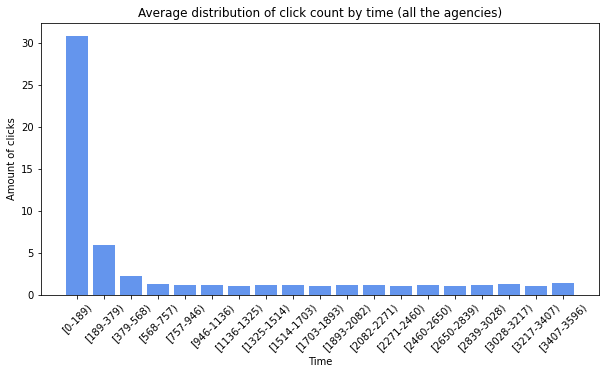

In [18]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (10, 5))
 
# Now we plot the information to take a look on the distribution
plt.bar(time, ckCount, color ='cornflowerblue',
        width = 0.8)
 
plt.xlabel("Time")
plt.ylabel("Amount of clicks")
plt.xticks(rotation='45')
plt.title("Average distribution of click count by time (all the agencies)")
plt.show()

2. Please find the agencyIDs that have a very different distribution compared to the average distribution overall.

In [19]:
# First of all we get rid of NaN values

df = df[df['agencyId'].notnull()]

In [20]:
# There aren't much agency's, so we can plot the distribution for each one and take a look on the plotted distributions

agency_list = list(df['agencyId'].unique())
len(agency_list)

27

<ipython-input-21-fb3aa1a015f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agency['timeRange'] = pd.cut(df_agency.time,bins=label_range,


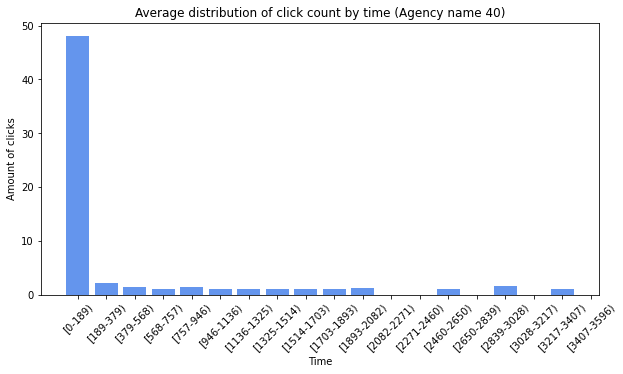

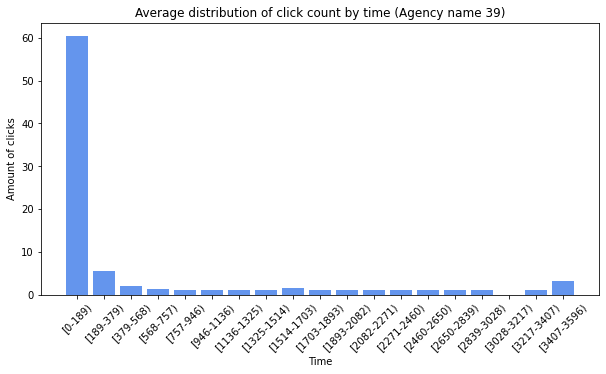

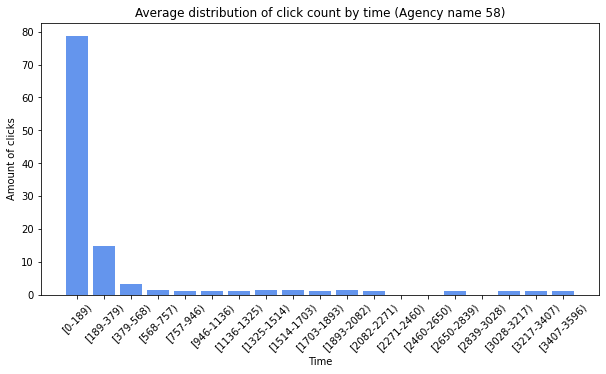

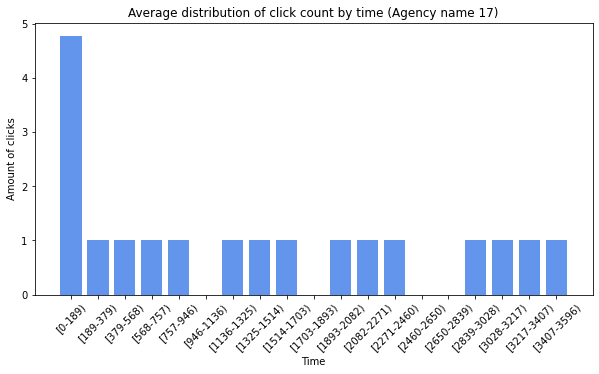

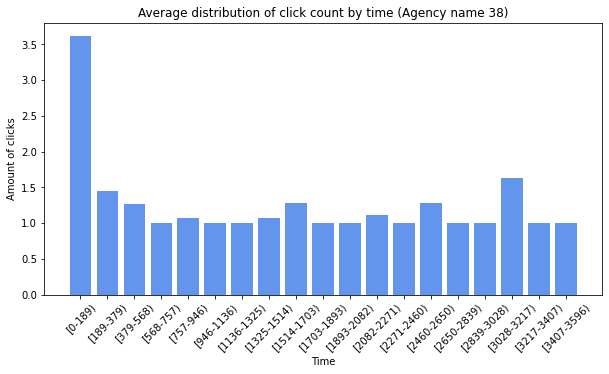

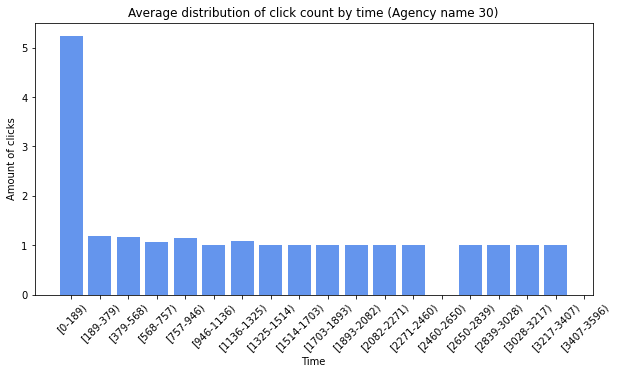

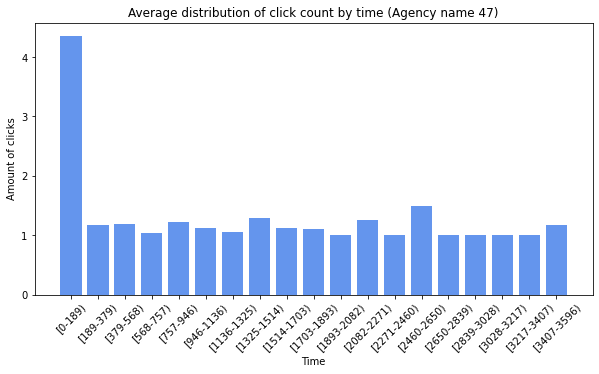

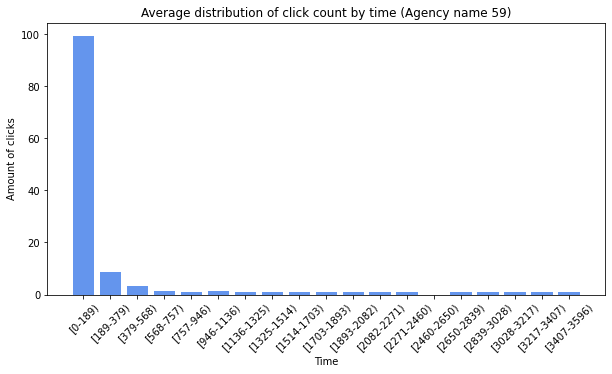

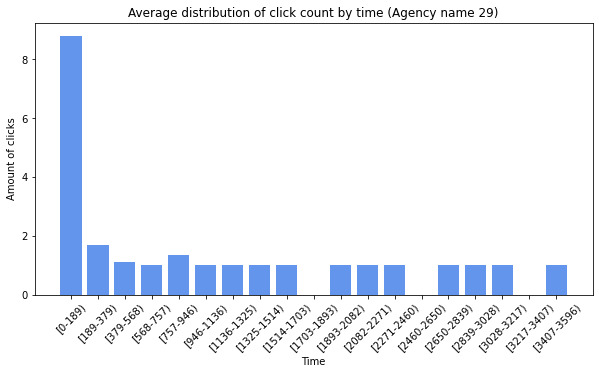

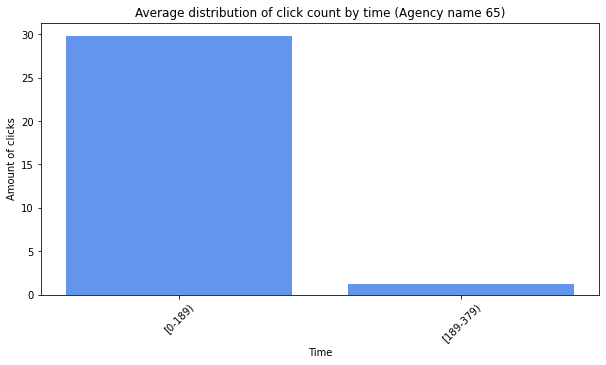

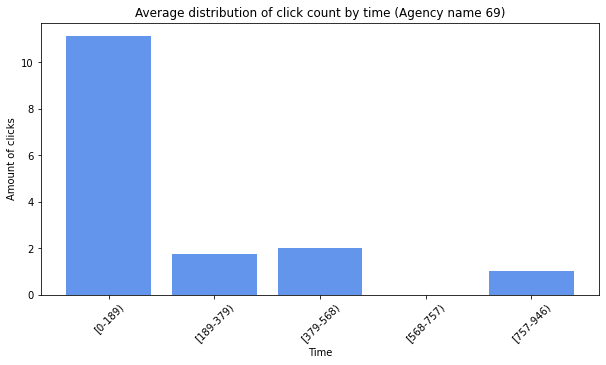

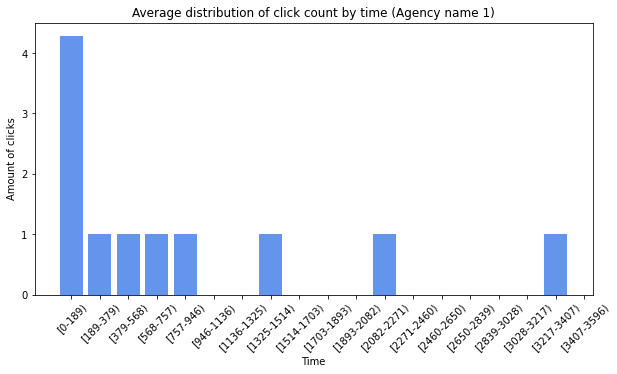

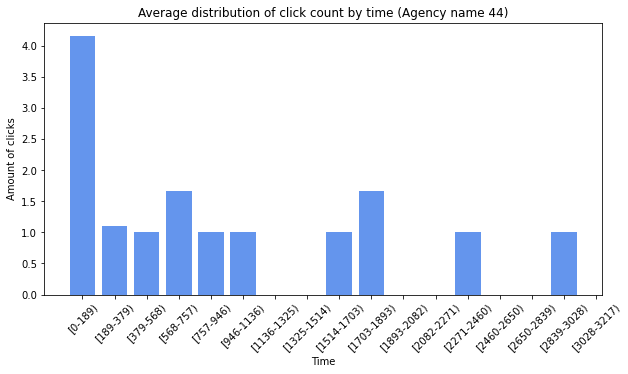

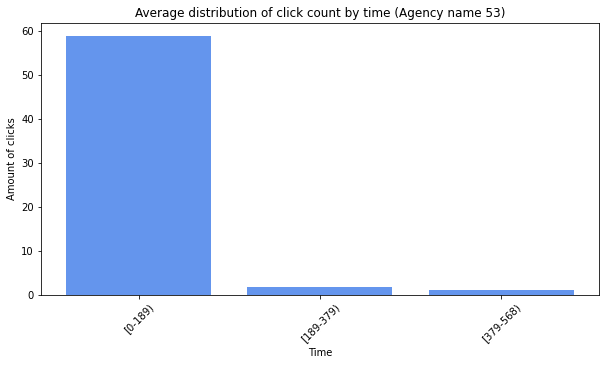

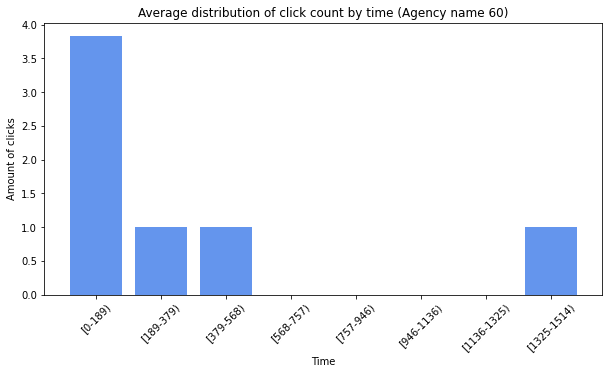

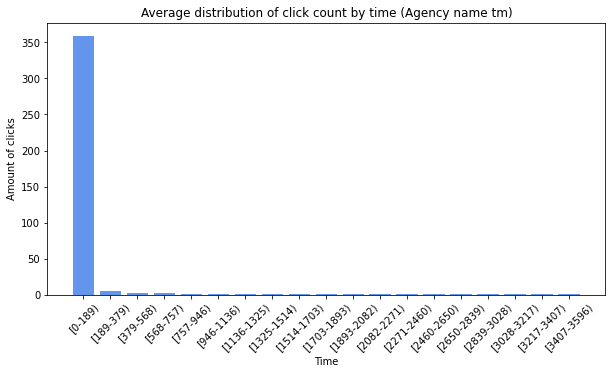

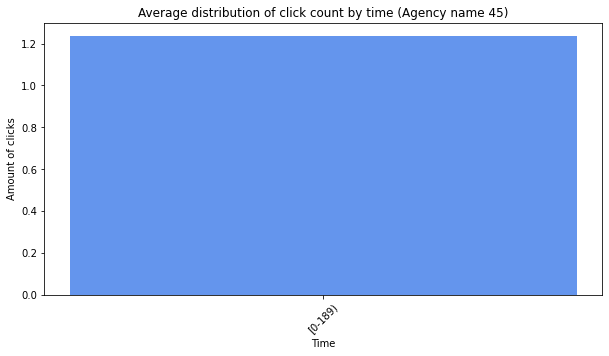

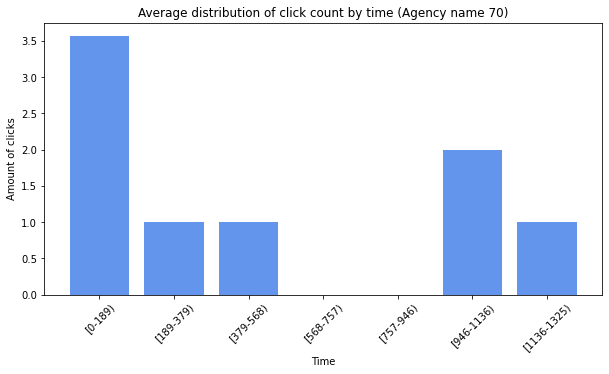

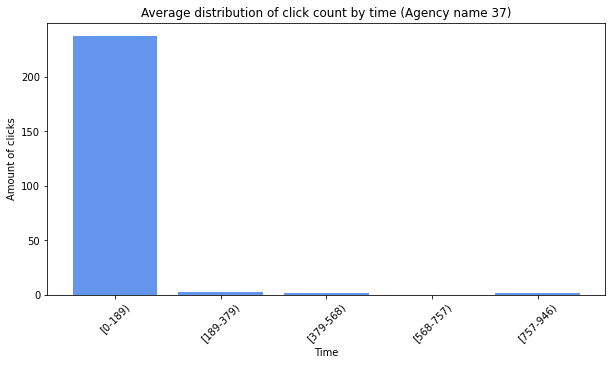

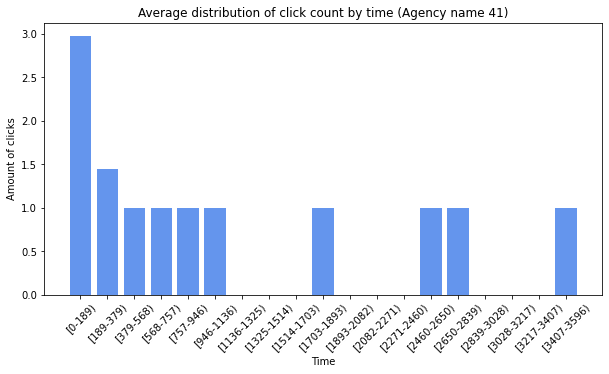

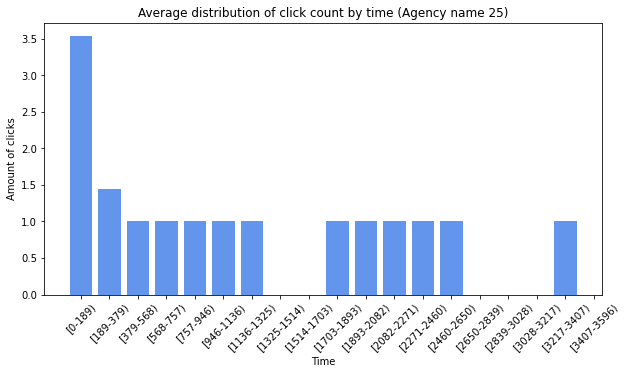

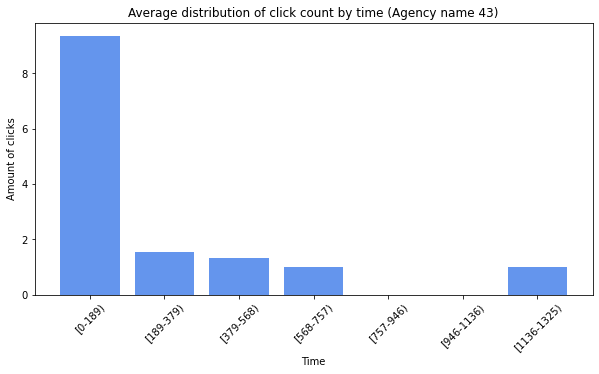

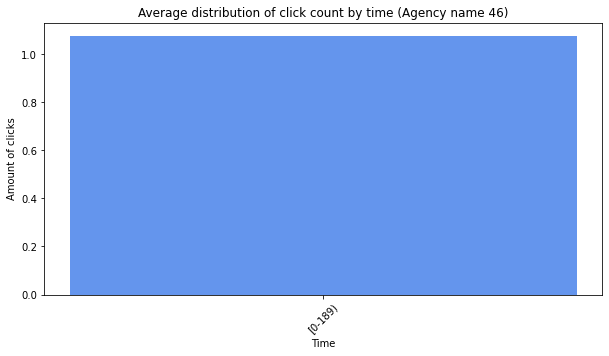

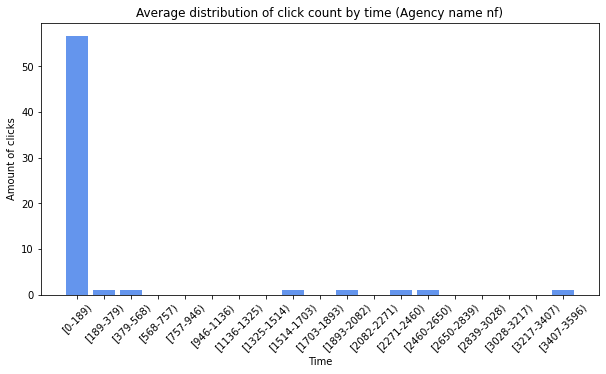

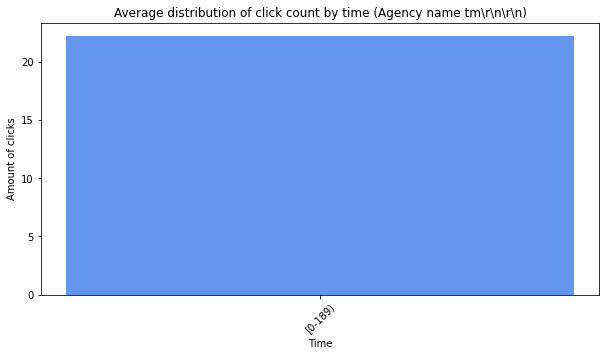

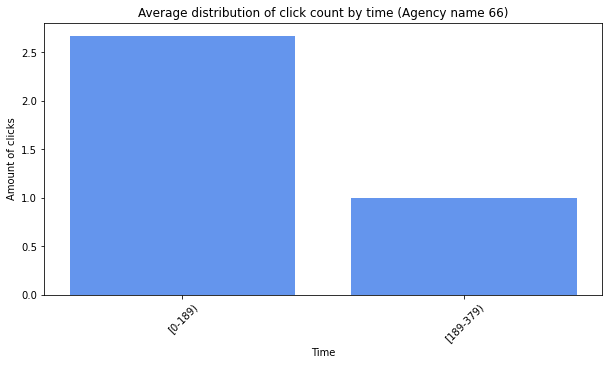

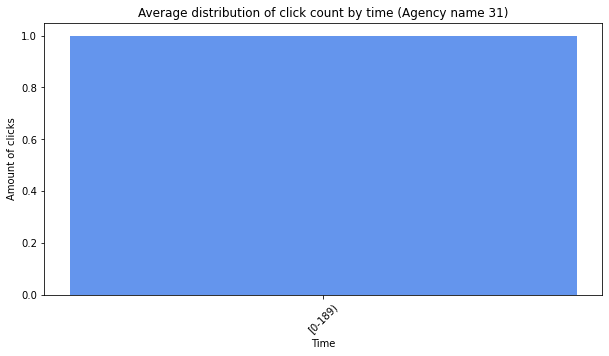

In [21]:
agency_list = list(df['agencyId'].unique())

label_range = np.round(np.linspace(0,max(df.time)+1,splits_n),3)
label_range = [round(x) for x in label_range]   
    
for agency in agency_list:
    df_agency = df[df['agencyId'] == agency]
    splits_n = 20
    df_agency['timeRange'] = pd.cut(df_agency.time,bins=label_range, 
                              labels=['[{}-{})'.format(label_range[i],label_range[i+1]) for i in np.arange(0,splits_n-1)],right=False)
    df_time = df_agency.groupby(['timeRange']).agg({'ckCount': 'mean'})
    time = list(df_time.index)
    ckCount = list(df_time['ckCount'])
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(time, ckCount, color ='cornflowerblue',
            width = 0.8)
 
    plt.xlabel("Time")
    plt.ylabel("Amount of clicks")
    plt.xticks(rotation='45')
    plt.title("Average distribution of click count by time (Agency name {})".format(agency))
    plt.show()

If we take a look on the Average distribution of click count for every single agency, we can notice that distribution is far more uniform for Agency 38 than for the rest, that have a higher concentration of clicks in the lower time ranges.

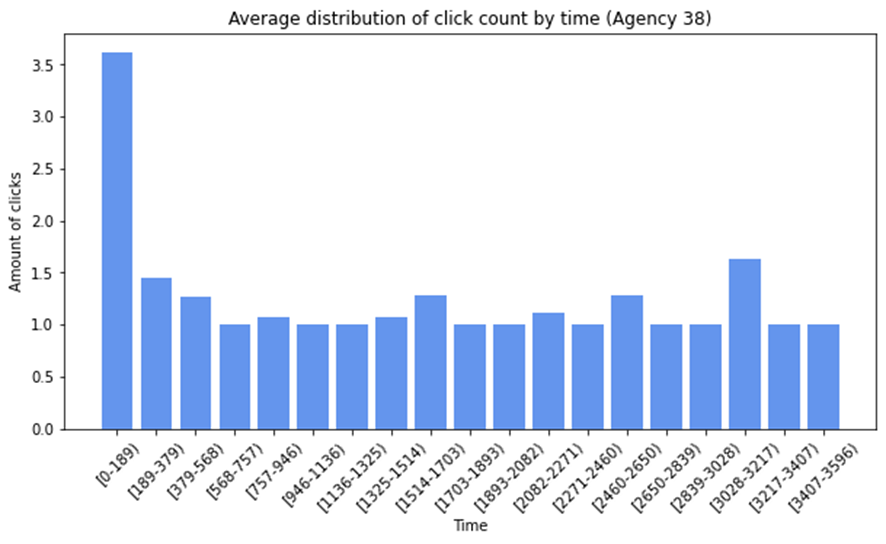

3. Please find the campNames that have a very different distribution compared to the average distribution overall.

In [38]:
# Once again, we filter de NaN values
df = df[df['campname'].notnull()]

c30110200                                                         172
46004                                                             142
29904_US                                                          141
709d5f9343                                                        113
47011                                                             106
                                                                 ... 
DM6496-180                                                          1
top.faqtoids.com_rlads_168181                                       1
1f0bc5e99413093US089211118213543c32e59                              1
AL:SSC-MX-ALL-ALL-ARIA Las Vegas DT 0511__hotel aria las vegas      1
designer_bikini_s_US_arw_dup1_009                                   1
Name: campname, Length: 6040, dtype: int64

In [22]:
campaign_list = list(df['campname'].unique())
len(campaign_list)

6041

There are more than 6.000 different campaigns, with most of them with very small sample sizes (5723 with less than 30 observations), so we can't plot and check one by one every single distribution.

If we focus on campaigns with a minimum number of observations, we can do a Kolmogorov-Smirnov test to check for the assemblance between every distribution with the average distribution of all campaigns. 

In [27]:
from scipy.stats import ks_2samp

campaign_list = list(df['campname'].unique())

label_range = np.round(np.linspace(0,max(df.time)+1,splits_n),3)
label_range = [round(x) for x in label_range]   

ks_result_list = []
p_value_list = []

# We will do a Kolmogorov-Smirnov test for every distribution, comparing them one by one to the global distribution

for campaign in campaign_list:
    df_campaign = df[df['campname'] == campaign]
    splits_n = 20
    df_campaign['timeRange'] = pd.cut(df_campaign.time,bins=label_range, 
                                      labels=['[{}-{})'.format(label_range[i],label_range[i+1]) for i in np.arange(0,splits_n-1)],
                                      right=False)
    df_time = df_campaign.groupby(['timeRange']).agg({'ckCount': 'mean'})
    time = list(df_time.index)
    ckCount = list(df_time['ckCount'])
    result = ks_2samp(df_time['ckCount'],
                      df.loc[df.campname == campaign, 'ckCount'])
    ks_result_list.append(result[0])
    p_value_list.append(result[1])

<ipython-input-27-99b6bde5eaa1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_campaign['timeRange'] = pd.cut(df_campaign.time,bins=label_range,


In [81]:
# We put all this information in a new dataframe

ks_df = pd.DataFrame(
    {'campname': campaign_list,
     'kolmogorov smirnov result': ks_result_list,
     'p_value': p_value_list
    })

In [80]:
# Now we create a table with campaings that have at least 30 observations

df_campname_count = df.groupby(['campname']).agg({'campname': 'count'})
df_campname_count.columns = ['campCount']
df_campname_count = df_campname_count[df_campname_count['campCount']>30]

In [83]:
# The next step is merging the two created tables so we can have the results just for the campaings with a minimum number of observations
merged = pd.merge(df_campname_count, ks_df, left_index=True, right_on='campname')

In [85]:
merged[merged['p_value']<0.01].sort_values(by='kolmogorov smirnov result', ascending=False)

,campCount,campname,kolmogorov smirnov result,p_value
184,31,CA-BP-S4-P3-MD-TdHomeInsurance,0.947368,3.288925e-12
467,33,CA-F-NM-QuickPersonalLoansSameDay-DOM,0.947368,1.361689e-12
1459,34,543201ce43,0.947368,8.909540e-13
215,34,1d928c0476,0.947368,8.909540e-13
816,31,3ab94cbc57,0.947368,3.288925e-12
...,...,...,...,...
135,142,46004,0.578947,7.781407e-06
743,74,1b9af64c57,0.578947,2.763146e-05
230,37,top.faqtoids.com_rlads_167829,0.578947,1.363045e-04
502,68,27033_GB,0.526316,2.472635e-04


As we can notice, the highest value (this is, the campaign which distributions looks more different than the average distribution) is the campaign 'CA-BP-S4-P3-MD-TdHomeInsurance'. We can confirm this by plotting the distribution of this campaign.

<ipython-input-23-2e3408b1fa30>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_campname['timeRange'] = pd.cut(df_campname.time,bins=label_range,


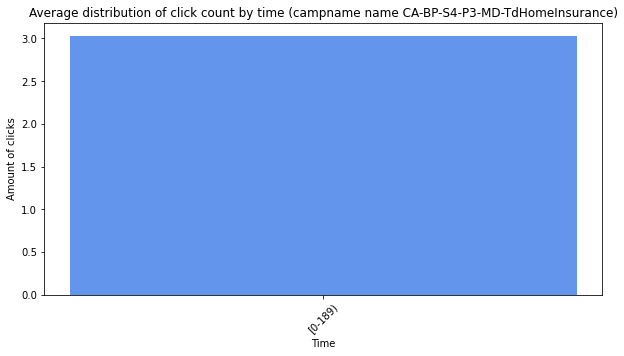

In [23]:
label_range = np.round(np.linspace(0,max(df.time)+1,splits_n),3)
label_range = [round(x) for x in label_range]   
    

df_campname = df[df['campname'] == 'CA-BP-S4-P3-MD-TdHomeInsurance']
splits_n = 20
df_campname['timeRange'] = pd.cut(df_campname.time,bins=label_range,
                                  labels=['[{}-{})'.format(label_range[i],label_range[i+1]) for i in np.arange(0,splits_n-1)],
                                  right=False)
df_time = df_campname.groupby(['timeRange']).agg({'ckCount': 'mean'})

time = list(df_time.index)
ckCount = list(df_time['ckCount'])

fig = plt.figure(figsize = (10, 5))
plt.bar(time, ckCount, color ='cornflowerblue',
        width = 0.8)

plt.xlabel("Time")
plt.ylabel("Amount of clicks")
plt.xticks(rotation='45')
plt.title("Average distribution of click count by time (campname name {})".format('CA-BP-S4-P3-MD-TdHomeInsurance'))
plt.show()